(675, 900, 3)


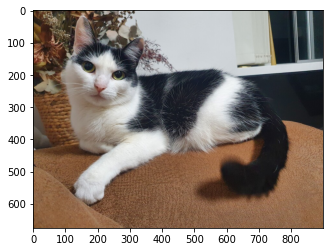

(960, 1280, 3)


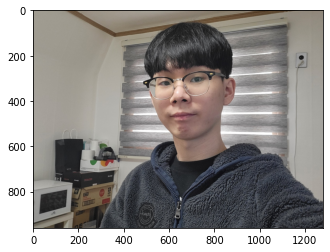

(960, 1280, 3)


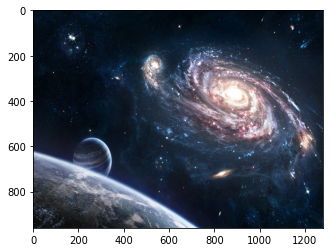

In [79]:
import os
import urllib
import cv2
import glob
import numpy as np
from PIL import Image
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

# 이미지 불러오기
img_path_cat = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat.png'  #https://bbs.ruliweb.com/community/board/300143/read/55468941 고양이 이미지 출처
img_orig_cat = cv2.imread(img_path_cat) 

print(img_orig_cat.shape)
plt.imshow(cv2.cvtColor(img_orig_cat, cv2.COLOR_BGR2RGB))
plt.show()


img_path_ywm = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_ywm.png' #내 사진
img_orig_ywm = cv2.imread(img_path_ywm) 

print(img_orig_ywm.shape)
plt.imshow(cv2.cvtColor(img_orig_ywm, cv2.COLOR_BGR2RGB))
plt.show()


img_path_uni = os.getenv('HOME')+'/aiffel/human_segmentation/images/universe.png'  #http://playwares.com/freegallery/5742615 우주 이미지 출처
img_orig_uni = cv2.imread(img_path_uni) 

#원래 크기가 커서 리사이즈 함수로 크기 조정
def img_resize(img_path):
    img = glob.glob(img_path)
    target_size=(1280, 960)
    for img in img:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "png")
    
img_resize(img_path_uni)

print(img_orig_uni.shape)
plt.imshow(cv2.cvtColor(img_orig_uni, cv2.COLOR_BGR2RGB))
plt.show()


In [80]:
#PixelLib 모델 다운로드

# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7ffa24030250>)

background
cat


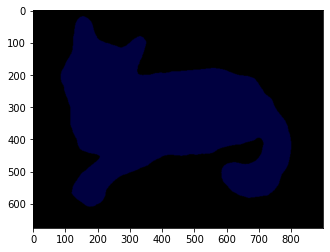

background
person
tv


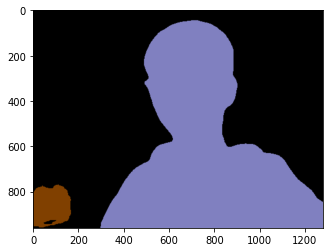

In [81]:
#다운로드한 모델을 이용해 PixelLib로 우리가 사용할 세그멘테이션 모델을 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

#모델에 이미지 입력
segvalues_cat, output_cat = model.segmentAsPascalvoc(img_path_cat)
segvalues_ywm, output_ywm = model.segmentAsPascalvoc(img_path_ywm)

#PASCAL VOC 데이터 라벨의 종류 ---> PASCAL VOC란?
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

#모델의 결과물
#분류
for class_id in segvalues_cat['class_ids']:
    print(LABEL_NAMES[class_id])

#이미지 출력
plt.imshow(output_cat)
plt.show()

#분류
for class_id in segvalues_ywm['class_ids']:
    print(LABEL_NAMES[class_id])

#이미지 출력
plt.imshow(output_ywm)
plt.show()

In [82]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
# output 이미지는 BGR순서로 배치되어있고 colormap는 RGB순서이다.
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [83]:
#고양이의 색상 코드
print(colormap[8])

#사람의 색상 코드
print(colormap[15])

[64  0  0]
[192 128 128]


In [84]:
#위의 색상 코드는 BRG이므로 RGB에 맞게 순서를 바꿔서 넣어준다.
seg_color_cat = (0, 0, 64)

seg_color_ywm = (128, 128, 192)

(675, 900)


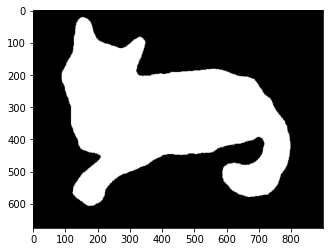

(960, 1280)


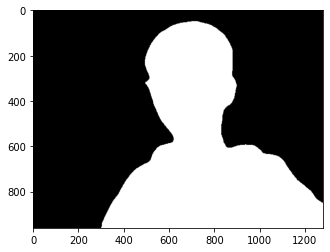

In [85]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map_cat = np.all(output_cat==seg_color_cat, axis=-1)
print(seg_map_cat.shape)
plt.imshow(seg_map_cat, cmap='gray')
plt.show()

seg_map_ywm = np.all(output_ywm==seg_color_ywm, axis=-1)
print(seg_map_ywm.shape)
plt.imshow(seg_map_ywm, cmap='gray')
plt.show()

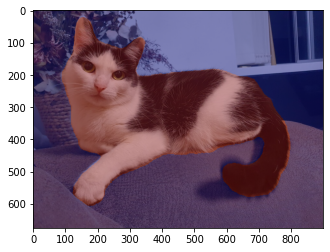

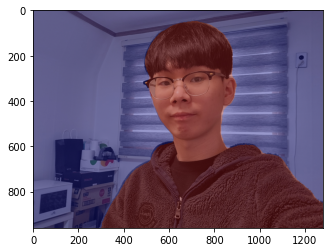

In [86]:
img_show_cat = img_orig_cat.copy()
img_show_ywm = img_orig_ywm.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask_cat = seg_map_cat.astype(np.uint8) * 255
img_mask_ywm = seg_map_ywm.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask_cat = cv2.applyColorMap(img_mask_cat, cv2.COLORMAP_JET)
color_mask_ywm = cv2.applyColorMap(img_mask_ywm, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show_cat = cv2.addWeighted(img_show_cat, 0.6, color_mask_cat, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_cat, cv2.COLOR_BGR2RGB))
plt.show()

img_show_ywm = cv2.addWeighted(img_show_ywm, 0.6, color_mask_ywm, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_ywm, cv2.COLOR_BGR2RGB))
plt.show()

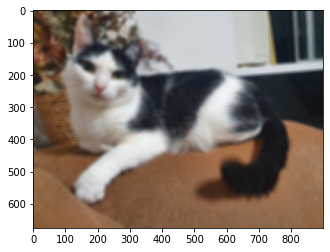

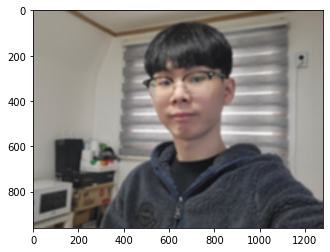

In [87]:
#블러 처리
# (30,30은 blurring kernel size를 뜻합니다
img_orig_blur_cat = cv2.blur(img_orig_cat, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur_cat, cv2.COLOR_BGR2RGB))
plt.show()

img_orig_blur_ywm = cv2.blur(img_orig_ywm, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur_ywm, cv2.COLOR_BGR2RGB))
plt.show()

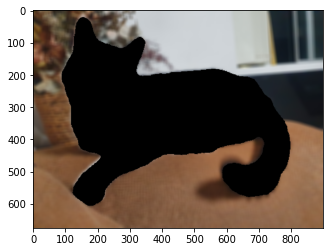

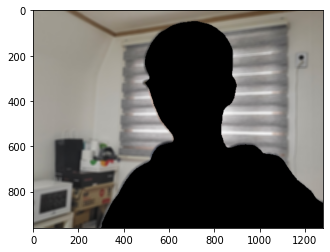

In [88]:
#흐려진 이미지에서 세그멘테이션 마스크를 이용해 배경만 추출
img_mask_color_cat = cv2.cvtColor(img_mask_cat, cv2.COLOR_GRAY2BGR)
img_bg_mask_cat = cv2.bitwise_not(img_mask_color_cat) #bitwise_not ---> 원래 사람이 255 배경이 0이였지만 함수를 통해 반전 시켜주었다.
img_bg_blur_cat = cv2.bitwise_and(img_orig_blur_cat, img_bg_mask_cat)
plt.imshow(cv2.cvtColor(img_bg_blur_cat, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color_ywm = cv2.cvtColor(img_mask_ywm, cv2.COLOR_GRAY2BGR)
img_bg_mask_ywm = cv2.bitwise_not(img_mask_color_ywm) #bitwise_not ---> 원래 사람이 255 배경이 0이였지만 함수를 통해 반전 시켜주었다.
img_bg_blur_ywm = cv2.bitwise_and(img_orig_blur_ywm, img_bg_mask_ywm)
plt.imshow(cv2.cvtColor(img_bg_blur_ywm, cv2.COLOR_BGR2RGB))
plt.show()

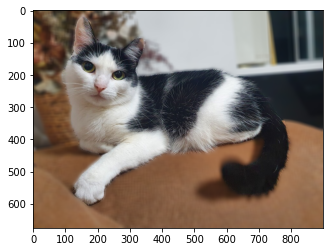

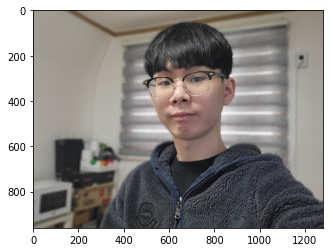

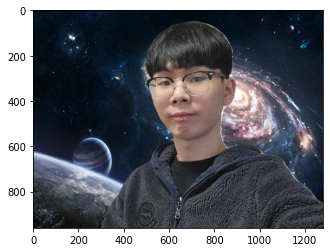

In [90]:
#블러처리한 배경 이미지와 사람 이미지 합치기
img_concat_cat = np.where(img_mask_color_cat==255, img_orig_cat, img_bg_blur_cat)
plt.imshow(cv2.cvtColor(img_concat_cat, cv2.COLOR_BGR2RGB))
plt.show()

img_concat_ywm = np.where(img_mask_color_ywm==255, img_orig_ywm, img_bg_blur_ywm)
plt.imshow(cv2.cvtColor(img_concat_ywm, cv2.COLOR_BGR2RGB))
plt.show()

img_concat_ywm = np.where(img_mask_color_ywm==255, img_orig_ywm, img_orig_uni)
plt.imshow(cv2.cvtColor(img_concat_ywm, cv2.COLOR_BGR2RGB))
plt.show()

(619, 488, 3)


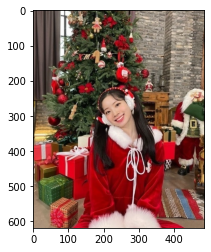

In [91]:
#인물사진에서 문제점 찾기

# 이미지 불러오기
img_path_problem = os.getenv('HOME')+'/aiffel/human_segmentation/images/problem_ex.png'  #http://www.todaysports.co.kr/news/articleView.html?idxno=43164
img_orig_problem = cv2.imread(img_path_problem) 

print(img_orig_problem.shape)
plt.imshow(cv2.cvtColor(img_orig_problem, cv2.COLOR_BGR2RGB))
plt.show()

background
dog
person
pottedplant


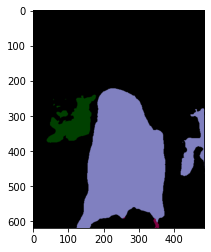

In [92]:
#모델에 이미지 입력
segvalues_problem, output_problem = model.segmentAsPascalvoc(img_path_problem)

#모델의 결과물
#분류
for class_id in segvalues_problem['class_ids']:
    print(LABEL_NAMES[class_id])

#이미지 출력
plt.imshow(output_problem)
plt.show()

#현재 결과로서 나타나는 것은 개, 사람, 화분인데 위에 사진에서 확인해보면 개와 화분은 찾을 수 없다.
#또한 정중앙의 피사체가 아닌 우측에 있는 인형의 일부를 사람이라고 인식하고 있다.

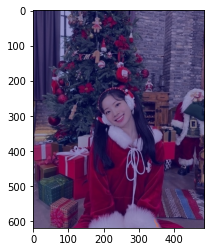

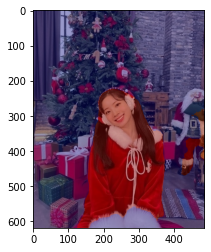

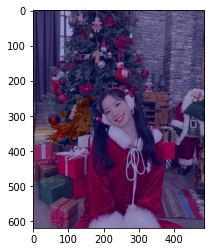

In [102]:
seg_color_dog = (128, 0, 64)
seg_map_dog = np.all(output_problem==seg_color_dog, axis=-1)
seg_color_person = (128, 128, 192)
seg_map_person = np.all(output_problem==seg_color_person, axis=-1)
seg_color_pottedplant = (0, 64, 0)
seg_map_pottedplant = np.all(output_problem==seg_color_pottedplant, axis=-1)

img_show_dog = img_orig_problem.copy()
img_show_person = img_orig_problem.copy()
img_show_pottedplant = img_orig_problem.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask_dog = seg_map_dog.astype(np.uint8) * 255
img_mask_person = seg_map_person.astype(np.uint8) * 255
img_mask_pottedplant = seg_map_pottedplant.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask_dog = cv2.applyColorMap(img_mask_dog, cv2.COLORMAP_JET)
color_mask_person = cv2.applyColorMap(img_mask_person, cv2.COLORMAP_JET)
color_mask_pottedplant = cv2.applyColorMap(img_mask_pottedplant, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show_dog = cv2.addWeighted(img_show_dog, 0.6, color_mask_dog, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_dog, cv2.COLOR_BGR2RGB))
plt.show()

img_show_person = cv2.addWeighted(img_show_person, 0.6, color_mask_person, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_person, cv2.COLOR_BGR2RGB))
plt.show()

img_show_pottedplant = cv2.addWeighted(img_show_pottedplant, 0.6, color_mask_pottedplant, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_pottedplant, cv2.COLOR_BGR2RGB))
plt.show()

#트리의 일부를 화분으로 오판하고 있다.
#하단의 털부분을 개로 오판하고 있다.
#중앙의 피사체는 제대로 인식했으나 우측에 있는 인형의 일부를 사람으로 오판하고 있다.